In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [83]:
data = pd.read_csv('Rainfall.csv')

In [84]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [85]:
data.shape

(366, 12)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [87]:
# remove extra spaces in column names
data.columns 

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [88]:
data.columns = data.columns.str.strip()

In [89]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [91]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [92]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [93]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [94]:
data = data.drop(columns='day')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      365 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [96]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [97]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [98]:
data['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [99]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])

In [100]:
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [101]:
# now checking again if there is any null value 
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [102]:
data['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [103]:
data['rainfall'] = data['rainfall'].map({"no": 0, "yes": 1})

In [104]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


### Exploratory Data Analysis - EDA

In [105]:
data.shape

(366, 11)

In [106]:
# setting plot style for all the plots
sns.set_style('whitegrid')

In [107]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [108]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

ValueError: num must be an integer with 1 <= num <= 9, not 10

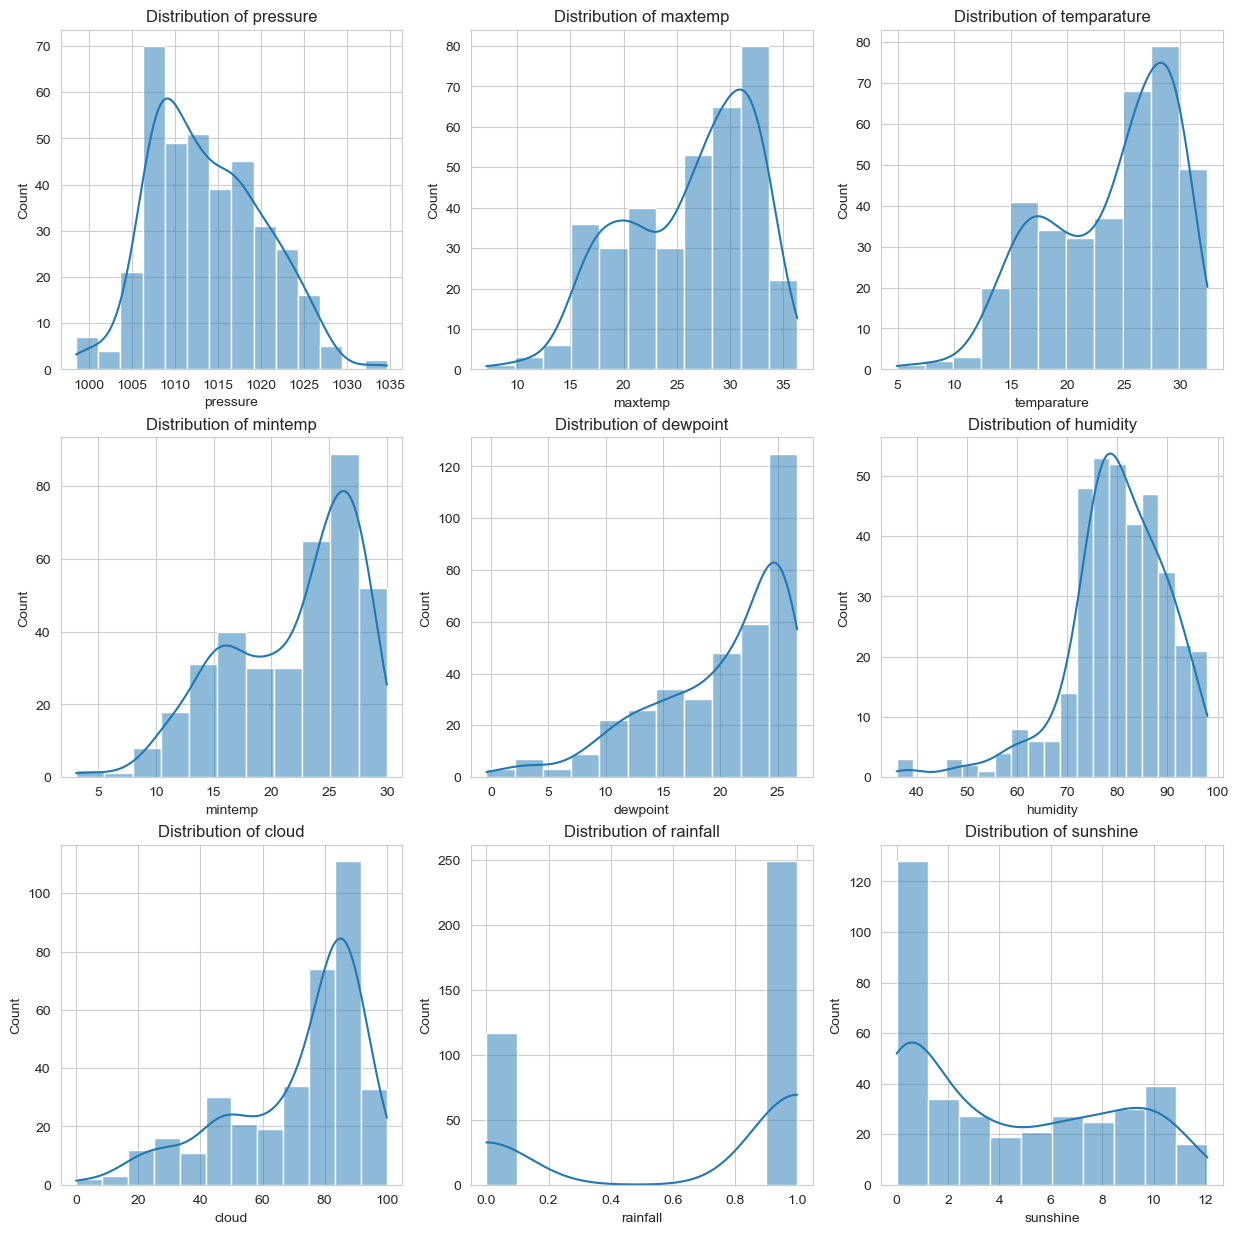

In [109]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

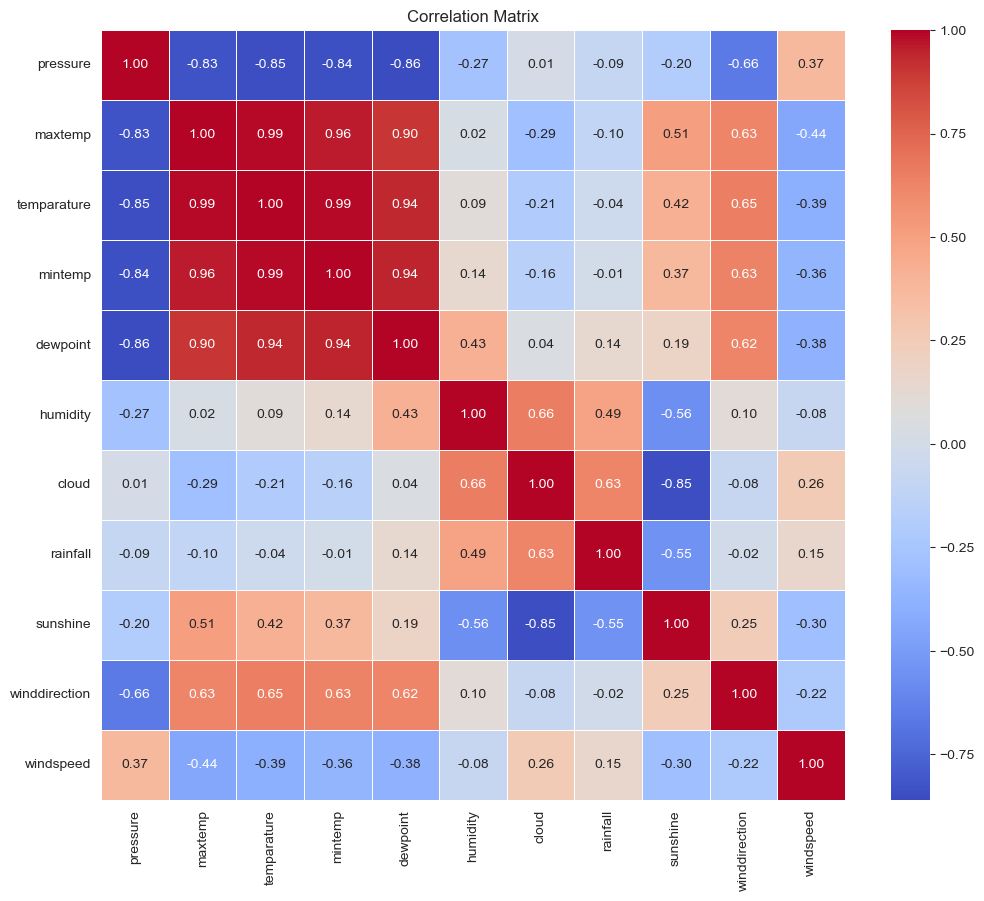

In [110]:
## corelation matrix 
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [111]:
## now by this we got to see that the some columns are highly correlated 
## hence we can drop some of them

data = data.drop(columns=['maxtemp', 'temparature', 'mintemp', 'dewpoint'])

In [112]:
data.head()

,pressure,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,72,49,1,9.3,80.0,26.3
1,1022.0,81,83,1,0.6,50.0,15.3
2,1019.7,95,91,1,0.0,40.0,14.2
3,1018.9,90,88,1,1.0,50.0,16.9
4,1015.9,95,81,1,0.0,40.0,13.7


In [113]:
data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [116]:
# seperating the majority and minority class
majority_class = data[data['rainfall'] == 1]
minority_class = data[data['rainfall'] == 0]

In [117]:
majority_class.shape, minority_class.shape

((249, 7), (117, 7))

In [118]:
# making the majority class equal to the minority class
df_majority_class = resample(majority_class, 
                             replace= False,
                             n_samples=len(minority_class),
                             random_state=42)  # reproducible results

In [120]:
new_data = pd.concat([df_majority_class, minority_class])

In [122]:
new_data.head()
new_data.tail()

,pressure,humidity,cloud,rainfall,sunshine,winddirection,windspeed
351,1025.9,39,25,0,9.1,20.0,35.6
352,1026.4,48,11,0,9.5,40.0,25.2
353,1025.4,62,71,0,2.1,30.0,29.0
360,1020.6,74,87,0,0.6,30.0,21.6
365,1026.4,74,66,0,5.7,20.0,23.3


In [123]:
new_data.shape

(234, 7)

In [124]:
## shuffle the final dataframe
new_data = new_data.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [125]:
new_data.head()

,pressure,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,78,90,1,0.0,30.0,28.5
1,1013.4,69,17,0,10.5,70.0,12.4
2,1006.1,74,27,0,10.8,220.0,8.7
3,1007.6,85,84,1,1.8,70.0,34.8
4,1021.2,66,18,0,10.1,20.0,24.4


In [126]:
X = new_data.drop(columns='rainfall', axis=1)
y = new_data['rainfall']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
model = RandomForestClassifier()

In [130]:
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [131]:
# Hyper parameter tuning
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [132]:
best_rf_model = grid_search.best_estimator_

In [135]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [139]:
## Model evaluation

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)

print("Cross-validation scores: ", cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.68421053 0.86842105 0.81081081 0.75675676 0.86486486]
Mean cross-validation score:  0.7970128022759603


In [142]:
# test set performance 

y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

print("Test set Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test set Accuracy:  0.7659574468085106
Test set Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.73      0.83      0.78        23

    accuracy                           0.77        47
   macro avg       0.77      0.77      0.77        47
weighted avg       0.77      0.77      0.77        47

Confusion Matrix:
 [[17  7]
 [ 4 19]]


In [143]:
X_train.columns

Index(['pressure', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

#### predicting on unknown data

In [144]:
input_data = (1015.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=X_train.columns)

In [146]:
print(input_df)

   pressure  humidity  cloud  sunshine  winddirection  windspeed
0    1015.9        95     81       0.0           40.0       13.7


In [149]:
prediction = best_rf_model.predict(input_df)
# print("Prediction for input data: ", prediction[0])
if prediction[0] == 1:
    print("Rainfall is expected.")
else:
    print("No rainfall expected.")

Rainfall is expected.


In [154]:
# save model and features names to a pickle file
model_data = {"model": best_rf_model, 'feature_names': X_train.columns.tolist()}

with open('model_data.pkl', 'wb') as f:
    pickle.dump(model_data, f)

In [155]:
## loading the model and feature names from the pickle file

with open('model_data.pkl', 'rb') as f:
    loaded_model_data = pickle.load(f)

In [156]:
model = loaded_model_data['model']
features_names = loaded_model_data['feature_names']

In [157]:
print(features_names)

['pressure', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


In [158]:
print(model)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5)


In [159]:
input_data = input_data = (1015.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=features_names)

In [160]:
prediction = model.predict(input_df)

In [161]:
print(prediction)

[1]


In [162]:
if prediction[0] == 1:
    print("Rainfall is expected.")
else:
    print("No rainfall expected.")

Rainfall is expected.
